In [36]:
import pandas as pd
import numpy as np

In [37]:
train_data = pd.read_csv('./data/train.csv')

In [38]:
train_data.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


- Age 84
- Typeof Contact 10
- DurationOfPitch 102
- NumerOfFollowups 13
- PreferredPropertyStar 10
- NumberOfTrips 57
- NumberOfChildrenVisiting 27
- MonthlyIncome 100

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

- id : 샘플 아이디
- Age : 나이
- TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
- CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
- DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
- Occupation : 직업
- Gender : 성별
- NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
- NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
- ProductPitched : 영업 사원이 제시한 상품
- PreferredPropertyStar : 선호 호텔 숙박업소 등급
- MaritalStatus : 결혼여부
- NumberOfTrips : 평균 연간 여행 횟수
- Passport : 여권 보유 여부 (0: 없음, 1: 있음)
- PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
- OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
- NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
- Designation : (직업의) 직급
- MonthlyIncome : 월 급여
- ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)


In [41]:
test_data = pd.read_csv("./data/test.csv")

In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2933 non-null   int64  
 1   Age                       2801 non-null   float64
 2   TypeofContact             2918 non-null   object 
 3   CityTier                  2933 non-null   int64  
 4   DurationOfPitch           2784 non-null   float64
 5   Occupation                2933 non-null   object 
 6   Gender                    2933 non-null   object 
 7   NumberOfPersonVisiting    2933 non-null   int64  
 8   NumberOfFollowups         2901 non-null   float64
 9   ProductPitched            2933 non-null   object 
 10  PreferredPropertyStar     2917 non-null   float64
 11  MaritalStatus             2933 non-null   object 
 12  NumberOfTrips             2850 non-null   float64
 13  Passport                  2933 non-null   int64  
 14  PitchSat

In [43]:
#test_data2 = test_data.dropna().reset_index(drop=True)

In [44]:
#test_data2

# EDA

In [45]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False 
import seaborn as sns
import sklearn.preprocessing

import warnings
warnings.filterwarnings(action='ignore')

- 결측치 확인

In [46]:
train_data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

- 결측치가 다양하게 발생
- 결측치를 함부로 0이나 평균으로 대체할 수 없음

---
- 숫자형은 소수가 없음 -> float64를 int64로 변환해도 됨


https://ichi.pro/ko/deiteo-seteueseo-gyeol-cheuggabs-eul-daechihaneun-mice-algolijeum-217004654686142

In [48]:
#train_data2 = train_data.dropna().reset_index(drop=True)

In [49]:
# float64인 Age, DurationOfPitch, NumberOfFollowups
# PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome
# 을 int64형으로 변환
# train_data2 = train_data2.astype({'Age':'int32'})
# train_data2 = train_data2.astype({'DurationOfPitch':'int32'})
# train_data2 = train_data2.astype({'NumberOfFollowups':'int32'})
# train_data2 = train_data2.astype({'PreferredPropertyStar':'int32'})
# train_data2 = train_data2.astype({'NumberOfTrips':'int32'})
# train_data2 = train_data2.astype({'NumberOfChildrenVisiting':'int32'})
# train_data2 = train_data2.astype({'MonthlyIncome':'int32'})
# train_data2

In [50]:
test_data

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,2,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,3,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3,4,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4,5,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,Self Enquiry,1,6.0,Small Business,Female,2,3.0,Super Deluxe,3.0,Single,7.0,0,4,1,1.0,AVP,32328.0
2929,2930,33.0,Self Enquiry,1,9.0,Small Business,Fe Male,4,2.0,Deluxe,3.0,Unmarried,2.0,0,3,0,1.0,Manager,23733.0
2930,2931,33.0,Company Invited,1,31.0,Salaried,Male,4,4.0,Deluxe,3.0,Divorced,3.0,0,4,1,1.0,Manager,23987.0
2931,2932,26.0,Self Enquiry,1,9.0,Small Business,Male,4,2.0,Basic,5.0,Unmarried,2.0,0,2,1,3.0,Executive,22102.0


In [32]:
# float64인 Age, DurationOfPitch, NumberOfFollowups
# PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome
# 을 int64형으로 변환
# test_data2 = test_data2.astype({'Age':'int32'})
# test_data2 = test_data2.astype({'DurationOfPitch':'int32'})
# test_data2 = test_data2.astype({'NumberOfFollowups':'int32'})
# test_data2 = test_data2.astype({'PreferredPropertyStar':'int32'})
# test_data2 = test_data2.astype({'NumberOfTrips':'int32'})
# test_data2 = test_data2.astype({'NumberOfChildrenVisiting':'int32'})
# test_data2 = test_data2.astype({'MonthlyIncome':'int32'})
# test_data2

In [14]:
# object형인 TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus, Designation
# TypeofContact는 2개
train_data2['TypeofContact'].unique()

array(['Company Invited', 'Self Enquiry'], dtype=object)

In [15]:
# Occupation은 4개
train_data2['Occupation'].unique()

array(['Small Business', 'Salaried', 'Large Business', 'Free Lancer'],
      dtype=object)

In [16]:
# 성별 3개
# Fe Male은 오타인가? 분석할 필요성이 있어보임
train_data2['Gender'].unique()

array(['Male', 'Fe Male', 'Female'], dtype=object)

In [17]:
# ProductPitched는 5개
train_data2['ProductPitched'].unique()

array(['Basic', 'Deluxe', 'Standard', 'Super Deluxe', 'King'],
      dtype=object)

In [18]:
# MaritalStatus는 4개
train_data2['MaritalStatus'].unique()

array(['Married', 'Divorced', 'Unmarried', 'Single'], dtype=object)

In [19]:
# Designation은 5개
train_data2['Designation'].unique()

array(['Executive', 'Manager', 'Senior Manager', 'AVP', 'VP'],
      dtype=object)

In [58]:
# sklearn에서 제공하는 label encoder로 object형을 int형으로 labeling
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_data['TypeofContact']=label_encoder.fit_transform(train_data['TypeofContact'])
test_data['TypeofContact']=label_encoder.transform(test_data['TypeofContact'])
train_data['Occupation']=label_encoder.fit_transform(train_data['Occupation'])
test_data['Occupation']=label_encoder.transform(test_data['Occupation'])
train_data['Gender']=label_encoder.fit_transform(train_data['Gender'])
test_data['Gender']=label_encoder.transform(test_data['Gender'])
train_data['ProductPitched']=label_encoder.fit_transform(train_data['ProductPitched'])
test_data['ProductPitched']=label_encoder.transform(test_data['ProductPitched'])
train_data['MaritalStatus']=label_encoder.fit_transform(train_data['MaritalStatus'])
test_data['MaritalStatus']=label_encoder.transform(test_data['MaritalStatus'])
train_data['Designation']=label_encoder.fit_transform(train_data['Designation'])
test_data['Designation']=label_encoder.transform(test_data['Designation'])
train_data

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,2,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
1,2,34.0,1,3,NaN,3,1,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
2,3,45.0,0,1,NaN,2,2,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,NaN,0
3,4,29.0,0,1,7.0,3,2,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
4,5,42.0,1,3,6.0,2,2,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,2,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1951,1952,41.0,1,3,8.0,2,1,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1952,1953,38.0,0,3,28.0,3,1,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0
1953,1954,28.0,1,3,30.0,3,1,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0,0


In [21]:
test_data2

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,3,37,1,3,22,3,2,3,4,1,3,1,5,0,5,1,0,2,21334
1,4,43,1,1,36,3,2,3,6,1,3,3,6,0,3,1,2,2,22950
2,5,25,1,3,7,1,1,4,4,0,4,3,3,1,4,1,3,1,21880
3,6,40,1,1,22,2,1,2,3,3,3,3,7,1,4,1,0,3,22945
4,7,55,0,1,8,2,2,3,3,3,4,0,4,0,2,1,1,3,25976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,2929,54,1,1,6,3,1,2,3,4,3,2,7,0,4,1,1,0,32328
2475,2930,33,1,1,9,3,0,4,2,1,3,3,2,0,3,0,1,2,23733
2476,2931,33,0,1,31,2,2,4,4,1,3,0,3,0,4,1,1,2,23987
2477,2932,26,1,1,9,3,2,4,2,0,5,3,2,0,2,1,3,1,22102


In [52]:
train_data2['Occupation'].unique()

array([3, 2, 1, 0], dtype=int64)

In [53]:
train_data2['Gender'].unique()

array([2, 0, 1], dtype=int64)

In [54]:
train_data2['ProductPitched'].unique()

array([0, 1, 3, 4, 2], dtype=int64)

In [55]:
train_data2['MaritalStatus'].unique()

array([1, 0, 3, 2], dtype=int64)

In [56]:
train_data2['Designation'].unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [99]:
imp = IterativeImputer(estimator = LinearRegression(), 
                       tol= 1e-10, 
                       max_iter=30, 
                       verbose=2, 
                       initial_strategy='mean',
                       imputation_order='ascending')

train_data2 = pd.DataFrame(imp.fit_transform(train_data))
test_data2 = pd.DataFrame(imp.fit_transform(test_data))

[IterativeImputer] Completing matrix with shape (1955, 20)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.03
[IterativeImputer] Change: 6542.0526850395545, scaled tolerance: 9.8678e-06 
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.07
[IterativeImputer] Change: 161.902068402208, scaled tolerance: 9.8678e-06 
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.10
[IterativeImputer] Change: 4.503350970687187, scaled tolerance: 9.8678e-06 
[IterativeImputer] Ending imputation round 4/30, elapsed time 0.12
[IterativeImputer] Change: 0.1288569788318199, scaled tolerance: 9.8678e-06 
[IterativeImputer] Ending imputation round 5/30, elapsed time 0.15
[IterativeImputer] Change: 0.003791703360022325, scaled tolerance: 9.8678e-06 
[IterativeImputer] Ending imputation round 6/30, elapsed time 0.17
[IterativeImputer] Change: 0.00011402542366312218, scaled tolerance: 9.8678e-06 
[IterativeImputer] Ending imputation round 7/30, elapsed time 0.21
[Iterat

In [63]:
train_data

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,2,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
1,2,34.0,1,3,NaN,3,1,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
2,3,45.0,0,1,NaN,2,2,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,NaN,0
3,4,29.0,0,1,7.0,3,2,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
4,5,42.0,1,3,6.0,2,2,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,2,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1951,1952,41.0,1,3,8.0,2,1,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1952,1953,38.0,0,3,28.0,3,1,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0
1953,1954,28.0,1,3,30.0,3,1,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0,0


In [62]:
train_data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,28.0,0.0,1.0,10.000000,3.0,2.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,1.0,0.0,1.0,1.0,20384.000000,0.0
1,2.0,34.0,1.0,3.0,16.887639,3.0,1.0,2.0,4.0,1.0,4.0,2.0,1.0,1.0,5.0,1.0,0.0,2.0,19599.000000,1.0
2,3.0,45.0,0.0,1.0,13.458070,2.0,2.0,2.0,3.0,1.0,4.0,1.0,2.0,0.0,4.0,1.0,0.0,2.0,21784.680589,0.0
3,4.0,29.0,0.0,1.0,7.000000,3.0,2.0,3.0,5.0,0.0,4.0,1.0,3.0,0.0,4.0,0.0,1.0,1.0,21274.000000,1.0
4,5.0,42.0,1.0,3.0,6.000000,2.0,2.0,2.0,3.0,1.0,3.0,0.0,2.0,0.0,3.0,1.0,0.0,2.0,19907.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951.0,28.0,1.0,1.0,10.000000,3.0,2.0,3.0,5.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,2.0,1.0,20723.000000,0.0
1951,1952.0,41.0,1.0,3.0,8.000000,2.0,1.0,3.0,3.0,4.0,5.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,31595.000000,0.0
1952,1953.0,38.0,0.0,3.0,28.000000,3.0,1.0,3.0,4.0,0.0,3.0,0.0,7.0,0.0,2.0,1.0,2.0,1.0,21651.000000,0.0
1953,1954.0,28.0,1.0,3.0,30.000000,3.0,1.0,3.0,5.0,1.0,3.0,1.0,3.0,0.0,1.0,1.0,2.0,2.0,22218.000000,0.0


In [64]:
train_data2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,978.000000,37.295373,0.715601,1.641432,15.494246,2.338107,1.588747,2.922762,3.717005,1.172890,3.568020,1.275192,3.280696,0.291049,3.067519,0.619437,1.214657,1.731458,23482.095825,0.195908
std,564.504207,9.010035,0.462445,0.908744,7.939947,0.627545,0.547326,0.712276,1.001263,1.270394,0.791397,0.933826,1.795001,0.454362,1.372915,0.485649,0.854729,0.954978,5543.414837,0.397000
min,1.000000,18.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.917055,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
25%,489.500000,31.000000,0.000000,1.000000,9.000000,2.000000,1.000000,2.000000,3.000000,0.000000,3.000000,1.000000,2.000000,0.000000,2.000000,0.000000,1.000000,1.000000,20346.000000,0.000000
50%,978.000000,36.000000,1.000000,1.000000,14.000000,2.000000,2.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,0.000000,3.000000,1.000000,1.000000,2.000000,22126.000000,0.000000
75%,1466.500000,43.000000,1.000000,3.000000,19.000000,3.000000,2.000000,3.000000,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,2.000000,2.000000,25401.500000,0.000000
max,1955.000000,61.000000,2.000000,3.000000,36.000000,3.000000,2.000000,5.000000,6.000000,4.000000,5.000000,3.000000,19.000000,1.000000,5.000000,1.000000,3.000000,4.000000,98678.000000,1.000000


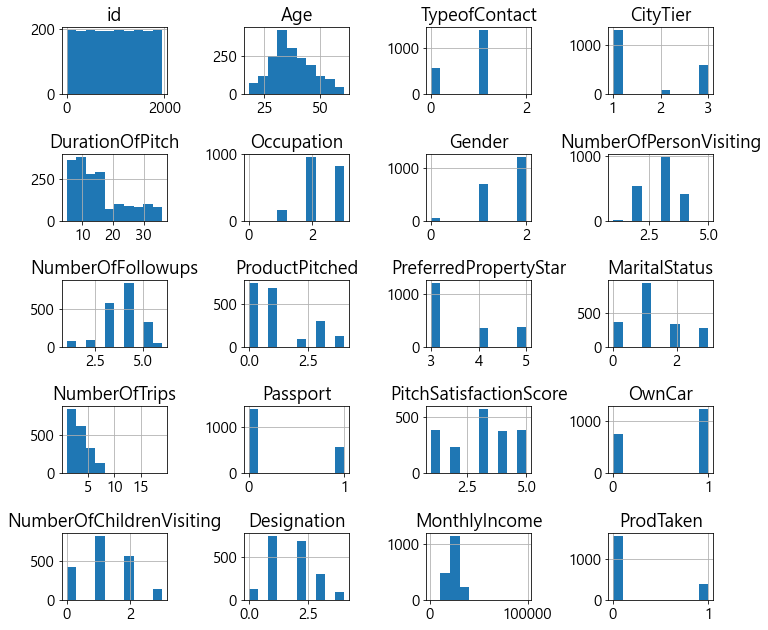

In [100]:
train_data.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

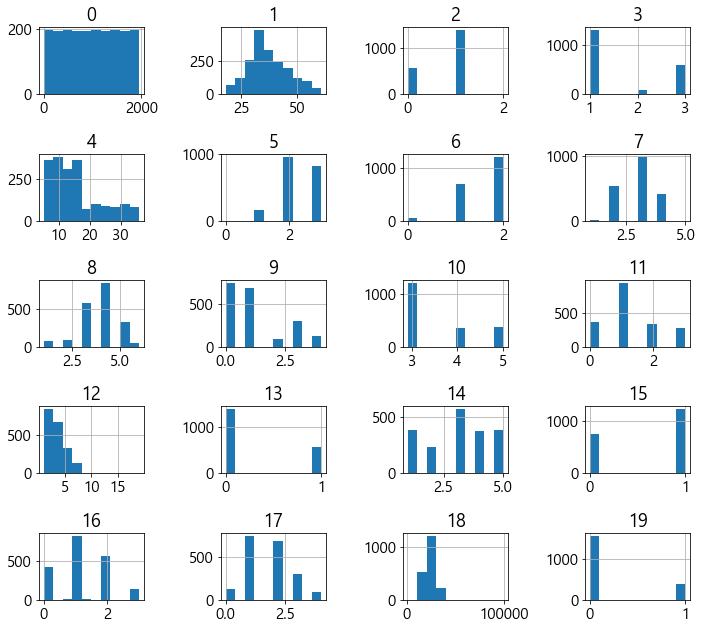

In [101]:
# 데이터 시각화
train_data2.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

- 본격적으로 데이터 분석 진행

## Age

In [30]:
train_data2['Age'].describe()

count    1649.000000
mean       37.021225
std         9.049227
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64

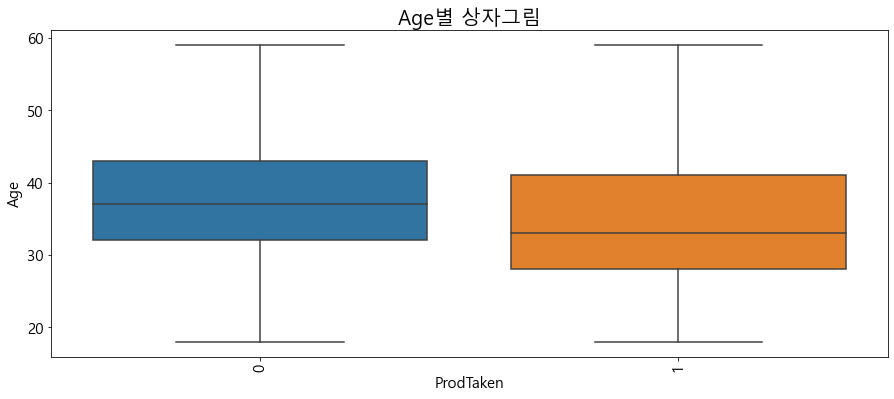

In [31]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
g = sns.boxplot(x='ProdTaken', y='Age', data=train_data2, showfliers=False)
g.set_title('Age별 상자그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

- 대체로 여행상품을 사는 사람들의 나이가 젊다는 것을 볼 수 있음

## TypeofContact 

- 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
- 회사의 홍보 : 0 , 스스로 검색 : 1

In [26]:
train_data2['TypeofContact'].describe()

count    1649.000000
mean        0.705882
std         0.455783
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: TypeofContact, dtype: float64

In [27]:
train_data2[train_data2['ProdTaken']==0]['TypeofContact'].value_counts()

1    946
0    367
Name: TypeofContact, dtype: int64

In [28]:
train_data2[train_data2['ProdTaken']==1]['TypeofContact'].value_counts()

1    218
0    118
Name: TypeofContact, dtype: int64

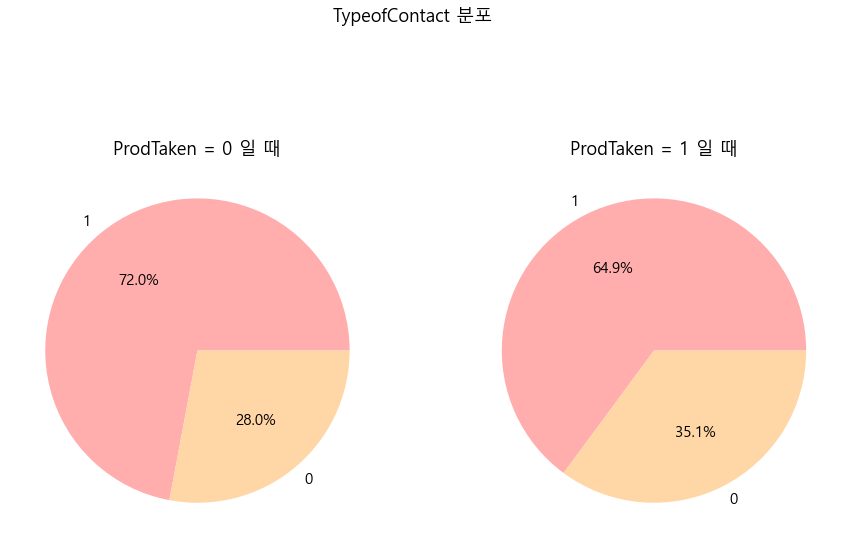

In [29]:
fig, axs = plt.subplots(1,2,figsize=(15,10)) # 그래프 크기 조정
fig.suptitle('TypeofContact 분포')
labels = [1,0]
colors = ['#ffadad', '#ffd6a5', '#fdffb6']
axs[0].pie(train_data2[train_data2['ProdTaken']==0]['TypeofContact'].value_counts(),colors=colors,labels=labels,autopct="%.1f%%")
axs[0].set_title('ProdTaken = 0 일 때')
axs[1].pie(train_data2[train_data2['ProdTaken']==1]['TypeofContact'].value_counts(),colors=colors,labels=labels,autopct="%.1f%%")
axs[1].set_title('ProdTaken = 1 일 때')
plt.show()

## CityTier 

- 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 

In [30]:
train_data2['CityTier'].describe()

count    1649.000000
mean        1.646452
std         0.912721
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         3.000000
Name: CityTier, dtype: float64

In [31]:
train_data2['CityTier'].value_counts()

1    1081
3     498
2      70
Name: CityTier, dtype: int64

In [32]:
train_data2[train_data2['ProdTaken']==0]['CityTier'].value_counts()

1    892
3    372
2     49
Name: CityTier, dtype: int64

In [33]:
train_data2[train_data2['ProdTaken']==1]['CityTier'].value_counts()

1    189
3    126
2     21
Name: CityTier, dtype: int64

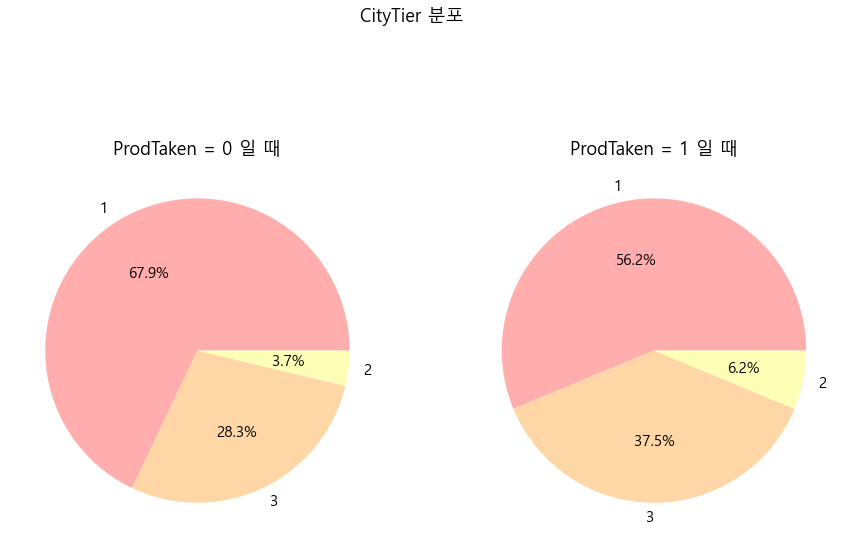

In [34]:
fig, axs = plt.subplots(1,2,figsize=(15,10)) # 그래프 크기 조정
fig.suptitle('CityTier 분포')
labels = [1,3,2]
colors = ['#ffadad', '#ffd6a5', '#fdffb6']
axs[0].pie(train_data2[train_data2['ProdTaken']==0]['CityTier'].value_counts(),colors=colors,labels=labels,autopct="%.1f%%")
axs[0].set_title('ProdTaken = 0 일 때')
axs[1].pie(train_data2[train_data2['ProdTaken']==1]['CityTier'].value_counts(),colors=colors,labels=labels,autopct="%.1f%%")
axs[1].set_title('ProdTaken = 1 일 때')
plt.show()

- 1등급이 낮아지고 2등급 3등급 비율이 올라감

## DurationOfPitch 

- 영업 사원이 고객에게 제공하는 프레젠테이션 기간

In [35]:
train_data2['DurationOfPitch'].describe()

count    1649.000000
mean       15.627653
std         8.149520
min         5.000000
25%         9.000000
50%        14.000000
75%        21.000000
max        36.000000
Name: DurationOfPitch, dtype: float64

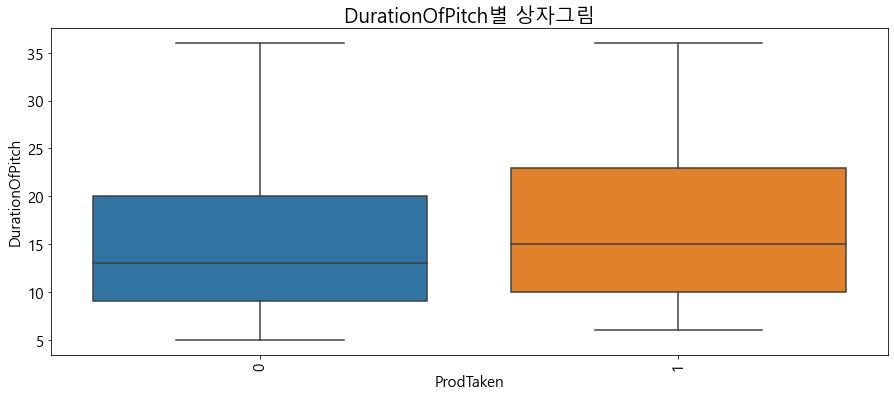

In [36]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
g = sns.boxplot(x='ProdTaken', y='DurationOfPitch', data=train_data2, showfliers=False)
g.set_title('DurationOfPitch별 상자그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

# 모델 학습

In [67]:
# 정규화를 위해 sklearn의 StandardScaler를 사용합니다.
from sklearn.preprocessing import StandardScaler

In [68]:
train_data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,28.0,0.0,1.0,10.000000,3.0,2.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,1.0,0.0,1.0,1.0,20384.000000,0.0
1,2.0,34.0,1.0,3.0,16.887639,3.0,1.0,2.0,4.0,1.0,4.0,2.0,1.0,1.0,5.0,1.0,0.0,2.0,19599.000000,1.0
2,3.0,45.0,0.0,1.0,13.458070,2.0,2.0,2.0,3.0,1.0,4.0,1.0,2.0,0.0,4.0,1.0,0.0,2.0,21784.680589,0.0
3,4.0,29.0,0.0,1.0,7.000000,3.0,2.0,3.0,5.0,0.0,4.0,1.0,3.0,0.0,4.0,0.0,1.0,1.0,21274.000000,1.0
4,5.0,42.0,1.0,3.0,6.000000,2.0,2.0,2.0,3.0,1.0,3.0,0.0,2.0,0.0,3.0,1.0,0.0,2.0,19907.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951.0,28.0,1.0,1.0,10.000000,3.0,2.0,3.0,5.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,2.0,1.0,20723.000000,0.0
1951,1952.0,41.0,1.0,3.0,8.000000,2.0,1.0,3.0,3.0,4.0,5.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,31595.000000,0.0
1952,1953.0,38.0,0.0,3.0,28.000000,3.0,1.0,3.0,4.0,0.0,3.0,0.0,7.0,0.0,2.0,1.0,2.0,1.0,21651.000000,0.0
1953,1954.0,28.0,1.0,3.0,30.000000,3.0,1.0,3.0,5.0,1.0,3.0,1.0,3.0,0.0,1.0,1.0,2.0,2.0,22218.000000,0.0


In [102]:
scaler = StandardScaler()

# 학습용 데이터를 이용해 scaler를 학습시킵니다.
scaler.fit(train_data2[[18]])

# 학습된 scaler를 사용해 데이터를 변환합니다.
scaled = scaler.transform(train_data2[[18]])

# 변환된 값을 새로운 column에 할당합니다.
train_data2[[18]] = scaled


In [103]:
train_data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,28.0,0.0,1.0,10.000000,3.0,2.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,1.0,0.0,1.0,1.0,-0.559022,0.0
1,2.0,34.0,1.0,3.0,16.887639,3.0,1.0,2.0,4.0,1.0,4.0,2.0,1.0,1.0,5.0,1.0,0.0,2.0,-0.700667,1.0
2,3.0,45.0,0.0,1.0,13.458070,2.0,2.0,2.0,3.0,1.0,4.0,1.0,2.0,0.0,4.0,1.0,0.0,2.0,-0.306282,0.0
3,4.0,29.0,0.0,1.0,7.000000,3.0,2.0,3.0,5.0,0.0,4.0,1.0,3.0,0.0,4.0,0.0,1.0,1.0,-0.398430,1.0
4,5.0,42.0,1.0,3.0,6.000000,2.0,2.0,2.0,3.0,1.0,3.0,0.0,2.0,0.0,3.0,1.0,0.0,2.0,-0.645092,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951.0,28.0,1.0,1.0,10.000000,3.0,2.0,3.0,5.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,2.0,1.0,-0.497852,0.0
1951,1952.0,41.0,1.0,3.0,8.000000,2.0,1.0,3.0,3.0,4.0,5.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,1.463895,0.0
1952,1953.0,38.0,0.0,3.0,28.000000,3.0,1.0,3.0,4.0,0.0,3.0,0.0,7.0,0.0,2.0,1.0,2.0,1.0,-0.330404,0.0
1953,1954.0,28.0,1.0,3.0,30.000000,3.0,1.0,3.0,5.0,1.0,3.0,1.0,3.0,0.0,1.0,1.0,2.0,2.0,-0.228094,0.0


In [104]:
train_input = train_data2.drop(columns=[0,19])

In [105]:
train_input

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,28.0,0.0,1.0,10.000000,3.0,2.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,1.0,0.0,1.0,1.0,-0.559022
1,34.0,1.0,3.0,16.887639,3.0,1.0,2.0,4.0,1.0,4.0,2.0,1.0,1.0,5.0,1.0,0.0,2.0,-0.700667
2,45.0,0.0,1.0,13.458070,2.0,2.0,2.0,3.0,1.0,4.0,1.0,2.0,0.0,4.0,1.0,0.0,2.0,-0.306282
3,29.0,0.0,1.0,7.000000,3.0,2.0,3.0,5.0,0.0,4.0,1.0,3.0,0.0,4.0,0.0,1.0,1.0,-0.398430
4,42.0,1.0,3.0,6.000000,2.0,2.0,2.0,3.0,1.0,3.0,0.0,2.0,0.0,3.0,1.0,0.0,2.0,-0.645092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,28.0,1.0,1.0,10.000000,3.0,2.0,3.0,5.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,2.0,1.0,-0.497852
1951,41.0,1.0,3.0,8.000000,2.0,1.0,3.0,3.0,4.0,5.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,1.463895
1952,38.0,0.0,3.0,28.000000,3.0,1.0,3.0,4.0,0.0,3.0,0.0,7.0,0.0,2.0,1.0,2.0,1.0,-0.330404
1953,28.0,1.0,3.0,30.000000,3.0,1.0,3.0,5.0,1.0,3.0,1.0,3.0,0.0,1.0,1.0,2.0,2.0,-0.228094


In [106]:
train_target = train_data2[19]

In [107]:
train_target

0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
1950    0.0
1951    0.0
1952    0.0
1953    0.0
1954    1.0
Name: 19, Length: 1955, dtype: float64

In [76]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
start = time.time() # 시작 시간 저장

# 랜덤 포레스트의 parameter 범위를 정의한다.
RF_params = {
    'n_estimators' : [50,100,150,200,300,500,1000],
    'max_features' : ['auto','sqrt'],
    'max_depth' : [8,10,12,14,16],
    'min_samples_leaf' : [1,2,4,8],
    'min_samples_split' : [2,3,5,10]}

# GridSearchCV를 이용하여 dict에Randomforest 모델을 저장한다. 
RF_models = {
    'RF': GridSearchCV(
    RandomForestClassifier(random_state=42), param_grid=RF_params, n_jobs=-1
    ).fit(train_input, train_target).best_estimator_}

print(f'걸린시간 : {np.round(time.time()-start, 3)}초') # 현재시간 - 시작시간(단위 초)

걸린시간 : 939.147초


In [92]:
import xgboost as xgb
start = time.time() # 시작 시간 저장

# xgboost parameter space를 정의한다.
XGB_params = {
    'min_child_weight' : [1,3,5,10],
    'gamma' : [0.3,0.5,1,1.5,2.5],
    'subsample' : [0.6,0.8,1.0,1.2],
    'colsample_bytree' : [0.6,0.8,1.0],
    'max_depth' : [3,4,5,7,10]}


# GridSearchCV를 통해 parameter를 탐색하게 정의한다.
XGB_gridsearch = GridSearchCV(xgb.XGBClassifier(random_state=42),
                                 param_grid=XGB_params, n_jobs=-1)

# 모델 학습
XGB_gridsearch.fit(train_input, train_target)

print(f'걸린시간 : {np.round(time.time()-start,3)}초') # 현재시간 - 시작시간(단위 초)

[00:01:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
걸린시간 : 284.99초


In [93]:
import joblib
#save
joblib.dump(RF_models,'RF_model.pkl')
joblib.dump(XGB_gridsearch,'XGB_model.pkl')

['XGB_model.pkl']

In [94]:
#load
model2 = joblib.load('RF_model.pkl')
model3 = joblib.load('XGB_model.pkl')

In [95]:
test_data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,32.0,0.0,3.0,16.134067,3.0,2.0,2.0,5.00000,1.0,3.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,19668.0
1,2.0,46.0,1.0,2.0,11.000000,3.0,2.0,3.0,3.44205,1.0,4.0,1.0,1.0,1.0,5.0,0.0,1.0,2.0,20021.0
2,3.0,37.0,1.0,3.0,22.000000,3.0,2.0,3.0,4.00000,1.0,3.0,1.0,5.0,0.0,5.0,1.0,0.0,2.0,21334.0
3,4.0,43.0,1.0,1.0,36.000000,3.0,2.0,3.0,6.00000,1.0,3.0,3.0,6.0,0.0,3.0,1.0,2.0,2.0,22950.0
4,5.0,25.0,1.0,3.0,7.000000,1.0,1.0,4.0,4.00000,0.0,4.0,3.0,3.0,1.0,4.0,1.0,3.0,1.0,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929.0,54.0,1.0,1.0,6.000000,3.0,1.0,2.0,3.00000,4.0,3.0,2.0,7.0,0.0,4.0,1.0,1.0,0.0,32328.0
2929,2930.0,33.0,1.0,1.0,9.000000,3.0,0.0,4.0,2.00000,1.0,3.0,3.0,2.0,0.0,3.0,0.0,1.0,2.0,23733.0
2930,2931.0,33.0,0.0,1.0,31.000000,2.0,2.0,4.0,4.00000,1.0,3.0,0.0,3.0,0.0,4.0,1.0,1.0,2.0,23987.0
2931,2932.0,26.0,1.0,1.0,9.000000,3.0,2.0,4.0,2.00000,0.0,5.0,3.0,2.0,0.0,2.0,1.0,3.0,1.0,22102.0


In [80]:
test_input = test_data2.drop(columns=[0])
test_input

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,32.0,0.0,3.0,16.134067,3.0,2.0,2.0,5.00000,1.0,3.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,19668.0
1,46.0,1.0,2.0,11.000000,3.0,2.0,3.0,3.44205,1.0,4.0,1.0,1.0,1.0,5.0,0.0,1.0,2.0,20021.0
2,37.0,1.0,3.0,22.000000,3.0,2.0,3.0,4.00000,1.0,3.0,1.0,5.0,0.0,5.0,1.0,0.0,2.0,21334.0
3,43.0,1.0,1.0,36.000000,3.0,2.0,3.0,6.00000,1.0,3.0,3.0,6.0,0.0,3.0,1.0,2.0,2.0,22950.0
4,25.0,1.0,3.0,7.000000,1.0,1.0,4.0,4.00000,0.0,4.0,3.0,3.0,1.0,4.0,1.0,3.0,1.0,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,54.0,1.0,1.0,6.000000,3.0,1.0,2.0,3.00000,4.0,3.0,2.0,7.0,0.0,4.0,1.0,1.0,0.0,32328.0
2929,33.0,1.0,1.0,9.000000,3.0,0.0,4.0,2.00000,1.0,3.0,3.0,2.0,0.0,3.0,0.0,1.0,2.0,23733.0
2930,33.0,0.0,1.0,31.000000,2.0,2.0,4.0,4.00000,1.0,3.0,0.0,3.0,0.0,4.0,1.0,1.0,2.0,23987.0
2931,26.0,1.0,1.0,9.000000,3.0,2.0,4.0,2.00000,0.0,5.0,3.0,2.0,0.0,2.0,1.0,3.0,1.0,22102.0


In [81]:
model2['RF'].predict(test_input)

array([0., 0., 0., ..., 0., 0., 0.])

In [82]:
submission = pd.read_csv('./data/sample_submission.csv')

In [83]:
submission

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2928,2929,0
2929,2930,0
2930,2931,0
2931,2932,0


In [84]:
submission['ProdTaken'] = model2['RF'].predict(test_input)

In [85]:
submission

,id,ProdTaken
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,1.0
...,...,...
2928,2929,0.0
2929,2930,0.0
2930,2931,0.0
2931,2932,0.0


In [86]:
submission.to_csv('travel_submission.csv',index=False)

In [96]:
submission['ProdTaken'] = model3.predict(test_input)

In [98]:
submission.to_csv('travel_submission2.csv',index=False)